In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
df = pd.read_csv(r'D:\chrome_Download\bikeshare.csv')

In [116]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [128]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


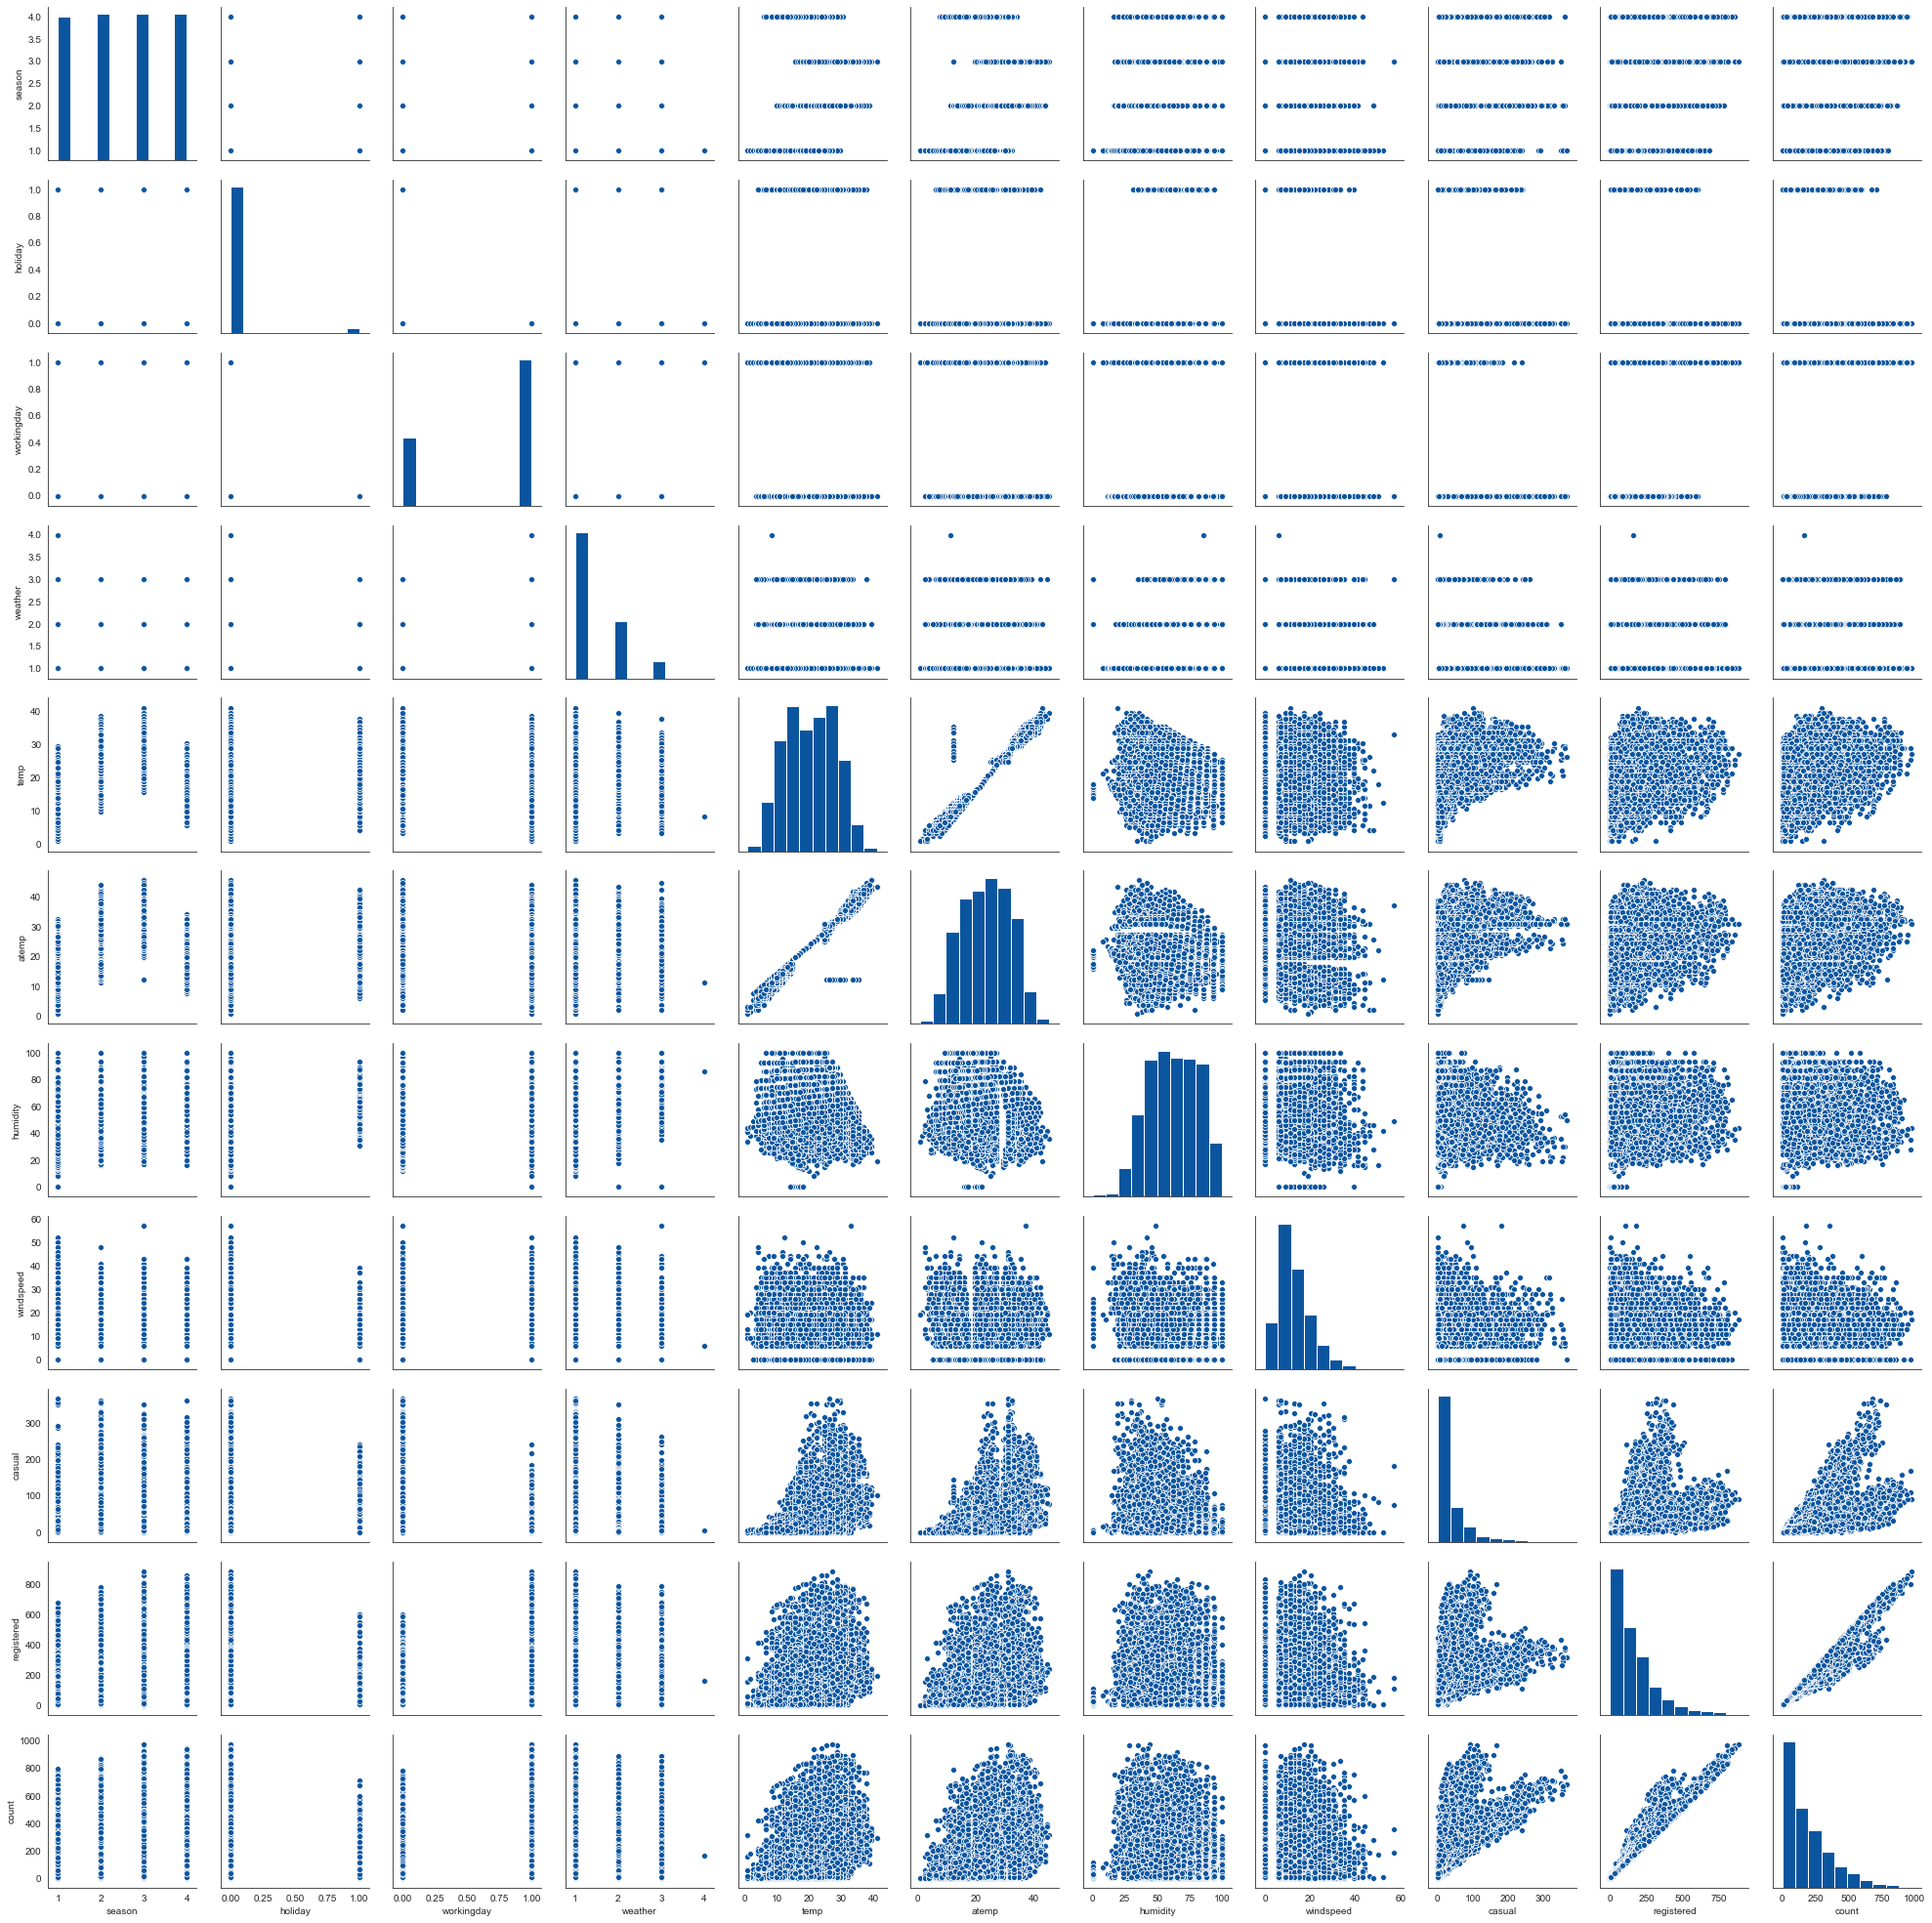

In [98]:
sns.pairplot(data = df)

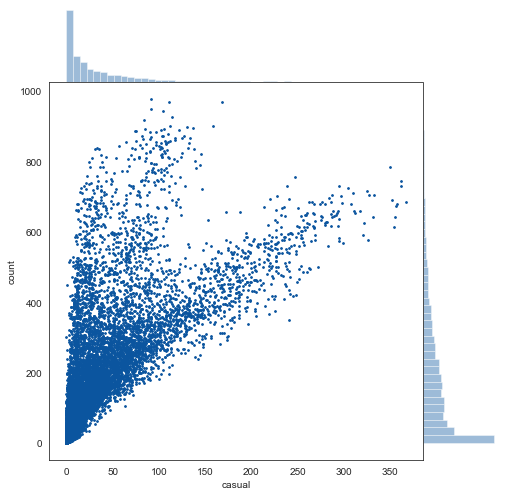

In [99]:
sns.jointplot(x ='casual', y ='count',data =df,height=7,space=0,s = 3)

In [100]:
sns.set_palette("Blues_r")
sns.set_style('white')

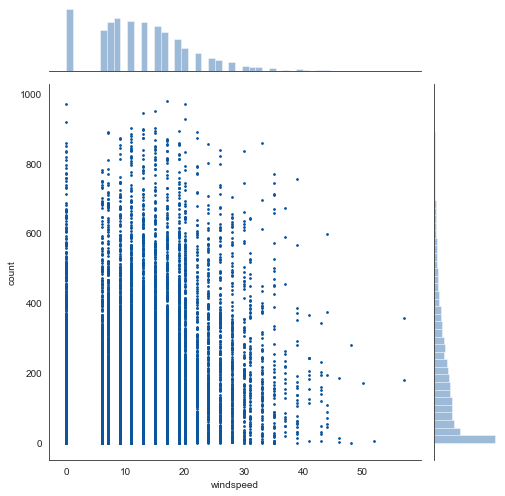

In [101]:
sns.jointplot(x ='windspeed', y ='count',data =df,height=7,space=0.21,s = 3)

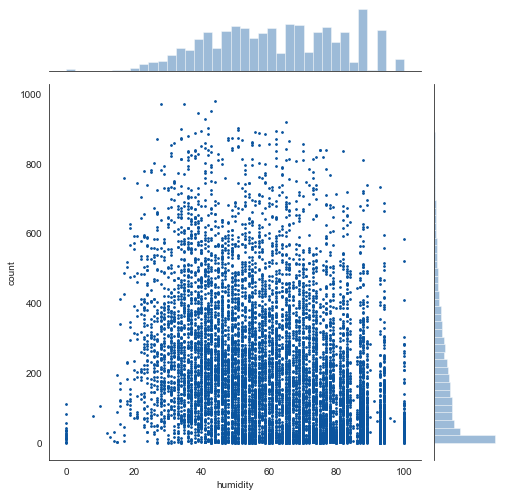

In [125]:
sns.jointplot(x ='humidity', y ='count',data =df,height=7,space=0.21,s= 3)

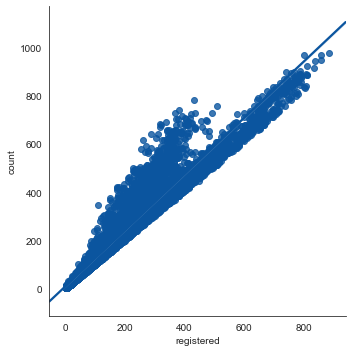

In [130]:
sns.lmplot(x = 'registered',y = 'count',data = df)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lm = LinearRegression()

In [106]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [107]:
y = df['count']
X = df[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered']]

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [110]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
lm.coef_

array([ 7.06489805e-14, -6.16391969e-14,  5.51372569e-16,  1.72245421e-16,
        1.00000000e+00,  1.00000000e+00])

In [112]:
prediction =lm.predict(X_test)

Text(0, 0.5, 'prediction')

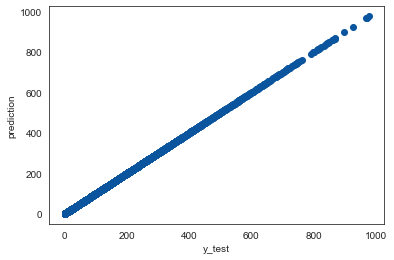

In [113]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [114]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:', metrics.mean_squared_log_error(y_test,prediction))

MAE: 1.665479348636599e-13
MSE: 5.290389376893436e-26
RMSE: 2.5137187628367773e-28


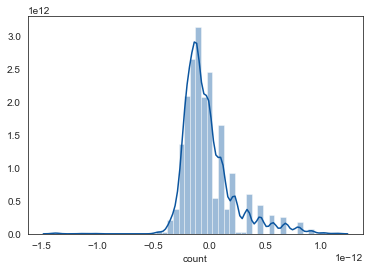

In [115]:
sns.distplot(y_test-prediction,bins = 50)